In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

!pip install python-docx

#import libraries
import pandas as pd
import ast
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
# Download NLTK stop words data
import nltk
nltk.download('stopwords')
from docx import Document

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#FUNCTION TO TAKE A FILE PATH THAT HAS A LIST OF WORDS WHERE EACH WORD IS ON ITS OWN LINE ALONE AND RETURN A REGULAR LIST OF THESE WORDS
def docx_to_list(input_path):
  # Create an empty list to store the words
  words = []

  # Load the Word document
  doc = Document(input_path)

  # Iterate through paragraphs and extract text
  for paragraph in doc.paragraphs:
      words.append(paragraph.text)

  return words

#GET STATS BY WORD LIST
def stats_by_word_list(word_list,blank):
  #note 'blank' is a place holder for the name of the type of words in the word list for exapmle 'profane' or 'religious'
  years = list(range(DATA_START_YEAR, DATA_END_YEAR+1))# Generate years from 1946 to 2022

  total_words = []
  num_blank_words = []
  num_unique_blank_words = []


  for i in range(DATA_START_YEAR,DATA_END_YEAR+1):


    word_counts = lyrics_df.loc[(lyrics_df['Hot100 Ranking Year'] == i) & lyrics_df['Lyrics'].notna(), 'Lyrics'].apply(lambda x: len(x) if x is not None else 0)
    total_words.append(word_counts.sum())


    blank_words_in_lyrics = []
    for index, row in lyrics_df[lyrics_df['Hot100 Ranking Year']== i].iterrows():
      #print(index)
      lyrics_list = row['Lyrics']
      if isinstance(lyrics_list, list):
        for word in lyrics_list:
          if word.lower() in word_list:
            blank_words_in_lyrics.append(word.lower())

    blank_words_in_lyrics_unique = list(set(blank_words_in_lyrics))

    num_blank_words.append(len(blank_words_in_lyrics))
    num_unique_blank_words.append(len(blank_words_in_lyrics_unique))



  data = {
      'year': years,
      'total_words': total_words,
      f'num_{blank}_words': num_blank_words,  # Replace with your actual data
      f'num_unique_{blank}_words': num_unique_blank_words  # Replace with your actual data

  }

  # Create a DataFrame
  df = pd.DataFrame(data)

  #Calculate the blank word rate
  df[f'{blank}_word_rate'] = df[f'num_{blank}_words'] / df['total_words']
  return df

#FUNCTIONS TO COLLECT THE INFORMATION TO MAKE THE FINAL PLOT OF THE DIFFERENT TOP WORDS VS YEAR

#returns a list of dictionaries one for each year with the counts of each word in the list used
def get_list_of_word_counts_by_year(word_list):
  words_by_year = {}


  for i in range(DATA_START_YEAR,DATA_END_YEAR+1,1):
    sub_df=lyrics_df[lyrics_df['Hot100 Ranking Year']==i]
    blank_words_in_lyrics = []

    for index, row in sub_df.iterrows():
      #print(index)
      lyrics_list = row['Lyrics']
      if isinstance(lyrics_list, list):
        for word in lyrics_list:
          if word.lower() in word_list:
            blank_words_in_lyrics.append(word.lower())


    # Use Counter to count occurrences of each word
    word_count_dict = Counter(blank_words_in_lyrics)

    # Convert the Counter object to a dictionary
    word_count_dict = dict(word_count_dict)

    # Print the resulting dictionary
    sorted_word_count = dict(sorted(word_count_dict.items(), key=lambda item: item[1], reverse=True))

    words_by_year[i]= sorted_word_count
  return words_by_year


  #change the list of dicts to a list of lists
def list_of_dicts_to_list_of_lists(list_of_dicts):
  list_of_lists = []

  for year, word_count_dict in list_of_dicts.items():
      # Convert the word count dictionary into a list of tuples
      word_count_list = list(word_count_dict.items())

      # Sort the list of tuples by count in descending order
      sorted_word_count_list = sorted(word_count_list, key=lambda item: item[1], reverse=True)

      # Append the sorted word count list to the final list
      list_of_lists.append(sorted_word_count_list)
  return list_of_lists

#make a table with year in row and all the list words as columns then put in the count for each word
def get_table_with_years_and_word_count_for_each_list_word(dict_of_dicts, word_list):
    df = pd.DataFrame(index=range(DATA_START_YEAR, DATA_END_YEAR+1), columns=word_list)

    # Fill in the DataFrame with values from your dictionary and replace NaN with 0
    for year, data in dict_of_dicts.items():
        for key, value in data.items():
            df.at[year, key] = value

    # Fill NaN cells with 0
    df = df.fillna(0)

    # Display the resulting DataFrame
    return df

#get a dataframe with the rates of each word
def get_rates_dataframe(word_counts_df,general_df_with_total_words_col):
  rate_df = word_counts_df.copy()

  for i in range(len(df_gen)):
    divider = general_df_with_total_words_col.loc[:,'total_words'][i]
    rate_df.iloc[i,:] = rate_df.iloc[i,:]/divider

  return rate_df


#FUNCTIONS TO MAKE GRAPHS

#plot year vs rate of the type of word like year vs the rate of profane words for example
def year_vs_word_type_rate(df,blank):
  # Assuming df is your DataFrame
  sns.regplot(x='year', y=f'{blank}_word_rate', data=df, order=2)  # Set order to the desired polynomial order

  # Optionally, you can add labels and a title
  plt.xlabel('year')
  plt.ylabel(f'{blank}_word_rate')
  plt.title(f'year vs {blank} word rate')

  # Show the plot
  plt.show()

#plot the year vs number of unique word for a type of word like profane or religious
def year_vs_unique_words_of_type(df, blank, graph_color='black', dot_color='coral'):
    # Assuming df is your DataFrame
    sns.scatterplot(x='year', y=f'num_unique_{blank}_words', data=df, color=dot_color)

    # Optionally, you can add labels and a title
    plt.xlabel('Year')
    plt.ylabel(f'Number of unique {blank} words')
    plt.title(f'Year vs Number of Unique {blank} Words')

    # Change the color of the graph
    plt.gca().spines['bottom'].set_color(graph_color)  # Change color of the x-axis
    plt.gca().spines['left'].set_color(graph_color)    # Change color of the y-axis
    plt.gca().tick_params(axis='x', colors=graph_color)  # Change color of x-axis ticks
    plt.gca().tick_params(axis='y', colors=graph_color)  # Change color of y-axis ticks

    # Show the plot
    plt.show()

def make_plot(word_counts_df, rates_df, top_x=10):
    column_sums = word_counts_df.sum()
    top_x_words = column_sums.sort_values(ascending=False).head(top_x)

    # Set up the plot using Seaborn
    sns.set(style="darkgrid")
    plt.figure(figsize=(12, 8))

    # Specify a more distinguishable color palette
    palette = sns.color_palette("husl", n_colors=top_x)

    # Plot a line for each word with the specified color
    for i, word in enumerate(list(top_x_words.index)):
        sns.lineplot(x=rates_df.index, y=word, data=rates_df, label=word, color=palette[i])

    # Set plot labels and title
    plt.title("Word Counts Over the Years")
    plt.xlabel("Year")
    plt.ylabel("Word Count / Total Words")
    plt.legend(title="Word")

    # Show the plot
    plt.show()

#FUNCTIONS TO EXPLORE THE DATASET MORE

#this function takes the lyrics_df with all the songs and a specific word then returns all the songs that have that word
def songs_containing_word(lyrics_df,word):
  idx =[]
  l=lyrics_df["Lyrics"]
  for i in l:
    if i== None:
      idx.append(False)
    else:
      idx.append(word in i)
  return lyrics_df[idx]


#this function takes a dataframe with songs ranked in a specfifc order for example by number of unique swear words see sorted_df, the rank in the df of the song you want to
#look into and a word list of the type of words you want to see the frequency of in the song
def get_word_count_breakdown_for_song(df,rank,word_list):
    lyrics = df.iloc[rank-1]['Lyrics'] #-1 is to make the ranking start from 1 instead of 0
    relevent_words = []
    for word in lyrics:
      if word in word_list:
        relevent_words.append(word)

    num_unque_words = len(set(relevent_words))

    # Plotting the histogram
    plt.hist(relevent_words, bins=num_unque_words, color='lightcoral', edgecolor='black', width=0.8)



    # Adding labels and title
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.title(df.iloc[rank-1]['Song'])

    # Rotate the x-axis labels
    plt.xticks(rotation=90)

    # Displaying the plot
    plt.show()

#These next functions are all basically supporting to make the graph in the previous function

def filter_type_of_words(words, word_list):
    words_of_type_in_lyrics = [word for word in words if word in word_list]
    return words_of_type_in_lyrics

def create_augment_data_based_on_words(lyrics_df, word_type, word_list):# return just augmented data
    # Filter out rows with None values in the 'Lyrics' column
    filtered_lyrics_df = lyrics_df.dropna(subset=['Lyrics']).copy()

    # Get the length of each list in the 'Lyrics' column
    filtered_lyrics_df['total_words'] = filtered_lyrics_df['Lyrics'].apply(len)

    # Filter profane words and create new columns
    filtered_lyrics_df = filtered_lyrics_df.assign(
        **{
            f'{word_type}_words': lambda df: df['Lyrics'].apply(filter_type_of_words, word_list=word_list),
            f'num_{word_type}_words': lambda df: df[f'{word_type}_words'].apply(len),
            f'unique_{word_type}_words': lambda df: df[f'{word_type}_words'].apply(set),
            f'num_unique_{word_type}_words': lambda df: df[f'unique_{word_type}_words'].apply(len),
            f'{word_type}_word_rate': lambda df: df[f'num_{word_type}_words'] / df['total_words']
        }
    )



    return filtered_lyrics_df


def sort_augmented_data(augmented_df,word_type,word_limit=1):# #word limit minimum occures of a type of worrd should a record have to stay

  #CHANGE THIS TO A FUNCTION???
  # Define conditions to filter out NaN values and songs with no profanity
  condition = augmented_df[f'num_{word_type}_words'] >= word_limit

  # Sort by profane word rate
  sorted_df = augmented_df.dropna().copy()  # Drop NaN values
  sorted_df = sorted_df[condition]  # Apply condition to filter songs with profanity
  sorted_df = sorted_df.sort_values(by=f'num_unique_{word_type}_words', ascending=False)

  return sorted_df


In [ ]:
#CONSTANTS
DATA_START_YEAR = 1946 #the first year we have data from
DATA_END_YEAR = 2022 #the last year we have data from

#read the csv containing the lyrics
lyrics_df = pd.read_csv('/content/drive/MyDrive/musicProfanity (1)/lyricsDf2.csv') #path to the csv of song lyrics

# Convert the string representation of lists to actual lists using ast.literal_eval
lyrics_df['Lyrics'] = lyrics_df['Lyrics'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else None)

#HERE YOU CAN JUST MAKE A VARIABLE WITH THE PATH TO YOUR WORD LIST
religious_words_path = '/content/drive/MyDrive/musicProfanity (1)/religious_words.docx'
#type_words_path ='path'

religious_words = docx_to_list(religious_words_path)

In [ ]:
#SOME GENERAL STATS ABOUT THE DATA SET
years = list(range(DATA_START_YEAR, DATA_END_YEAR+1))# Generate years from 1946 to 2022
total_songs = []
total_lyrics_found =[]
avg_song_length_words = []
total_words = []

num_stopwords = []


# Function to count stop words in a list
'''def count_stop_words(word_list):
    if word_list is None:
        return 0  # Return 0 for None values (no stop words)

    stop_words = set(stopwords.words('english'))
    return len([word for word in word_list if word.lower() in stop_words])'''


for i in range(DATA_START_YEAR,DATA_END_YEAR+1):
  total_songs.append(len(lyrics_df[lyrics_df['Hot100 Ranking Year'] == i]))

  word_counts = lyrics_df.loc[(lyrics_df['Hot100 Ranking Year'] == i) & lyrics_df['Lyrics'].notna(), 'Lyrics'].apply(lambda x: len(x) if x is not None else 0)
  avg_song_length_words.append(word_counts.mean())
  total_words.append(word_counts.sum())

  total_lyrics_found.append(len(lyrics_df.loc[(lyrics_df['Hot100 Ranking Year'] == i) & lyrics_df['Lyrics'].notna()]))

  #############################
  #total_stop_words = lyrics_df[lyrics_df['Hot100 Ranking Year']==i]['Lyrics'].apply(count_stop_words).sum()

  #num_stopwords.append(total_stop_words)
  #############################

data = {
    'year': years,
    'total_songs': total_songs,
    'songs_lyrics_found': total_lyrics_found,
    'avg_song_length_words': avg_song_length_words,
    'total_words': total_words,
    #'num_stopwords': num_stopwords
}

# Create a DataFrame
df = pd.DataFrame(data)

#Calculate the percent of songs successulfy found
df['percentage_lyrics_found'] = (df['songs_lyrics_found'] / df['total_songs'])*100

#calculate stopword rate
#df['stopword_rate'] = df['num_stopwords'] / df['total_words']

new_order = [ 'year',
              'total_songs',
              'songs_lyrics_found',
              'percentage_lyrics_found',
              'avg_song_length_words',
              'total_words',
              #'num_stopwords',
              #'stopword_rate'
              ]
df = df[new_order]


df_gen = df

In [ ]:
df_gen

,year,total_songs,songs_lyrics_found,percentage_lyrics_found,avg_song_length_words,total_words
0,1946,41,28,68.292683,180.285714,5048
1,1947,47,33,70.212766,177.939394,5872
2,1948,39,25,64.102564,170.360000,4259
3,1949,30,20,66.666667,167.300000,3346
4,1950,30,20,66.666667,183.400000,3668
...,...,...,...,...,...,...
72,2018,100,94,94.000000,480.574468,45174
73,2019,100,96,96.000000,446.072917,42823
74,2020,100,97,97.000000,443.649485,43034
75,2021,100,96,96.000000,410.302083,39389


In [ ]:
augmented_df=create_augment_data_based_on_words(lyrics_df,'religious',religious_words)
augmented_df

In [ ]:
sorted_df = sort_augmented_data(augmented_df,'religious',1)
sorted_df

<ipython-input-9-fa6f738de3ce>:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sorted_df = sorted_df[condition]  # Apply condition to filter songs with profanity


In [ ]:
dfr=stats_by_word_list(religious_words,'religious')
dfr

,year,total_words,num_religious_words,num_unique_religious_words,religious_word_rate
0,1946,5048,4,3,0.000792
1,1947,5872,11,6,0.001873
2,1948,4259,10,6,0.002348
3,1949,3346,15,7,0.004483
4,1950,3668,4,3,0.001091
...,...,...,...,...,...
72,2018,45174,107,16,0.002369
73,2019,42823,69,15,0.001611
74,2020,43034,95,13,0.002208
75,2021,39389,128,13,0.003250


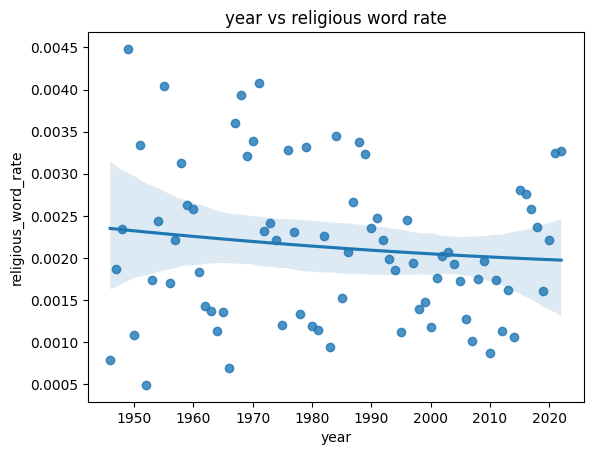

In [ ]:
year_vs_word_type_rate(dfr,'religious')

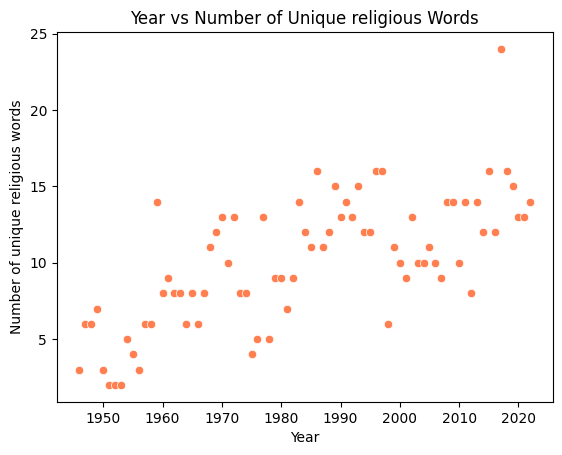

In [ ]:
year_vs_unique_words_of_type(dfr,'religious')

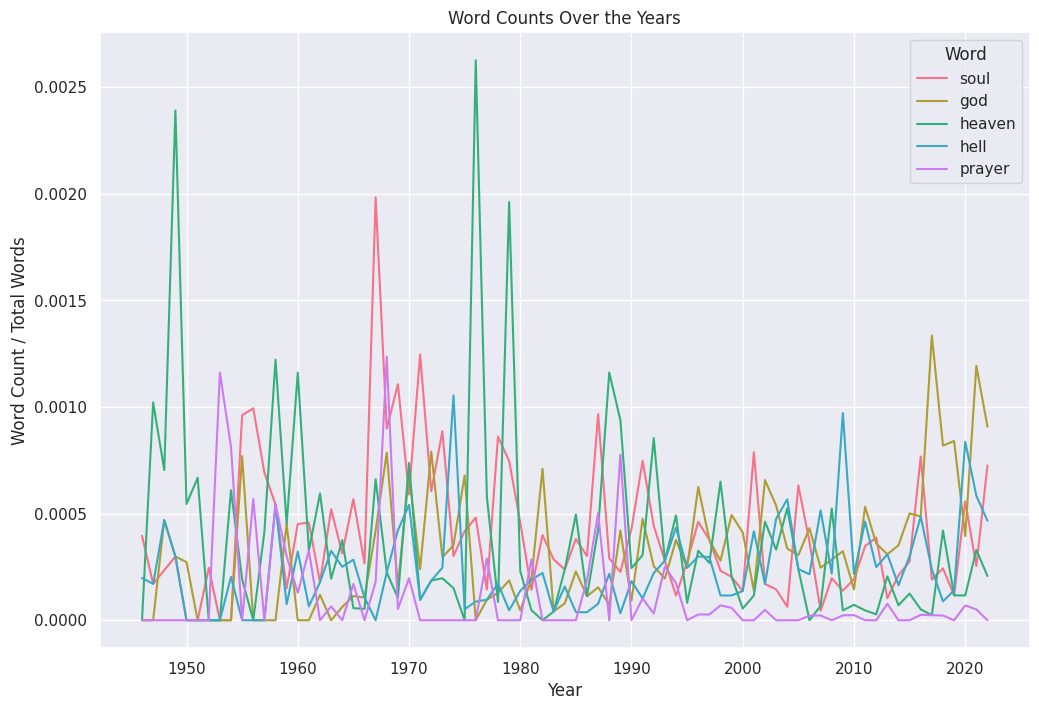

In [ ]:
# religious words
words_by_year = get_list_of_word_counts_by_year(religious_words)
df=get_table_with_years_and_word_count_for_each_list_word(words_by_year,religious_words)
rates=get_rates_dataframe(df,df_gen)
make_plot(df, rates, top_x=5)

In [ ]:
songs_containing_word(lyrics_df,'hell')

,Song,Artist Names,Hot100 Ranking Year,Hot100 Rank,Lyrics
22,Doin' What Comes Natur'lly,['dinah shore'],1946,21,"[folks, are, dumb, where, i, come, from, they,..."
84,"Open The Door, Richard",['dusty fletcher'],1947,33,"[oh, so, you, throwed, me, out, huh, well, tha..."
121,Woody Woodpecker - Remastered 2005,"['mel blanc', 'the sportsmen']",1948,30,"[hohoho, ho, ho, hohoho, ho, ho, oh, thats, th..."
127,Riders In the Sky,['vaughn monroe'],1949,1,"[an, old, cowpoke, went, riding, out, one, dar..."
279,Hey There,['rosemary clooney'],1954,3,"[lately, when, im, in, my, room, all, by, myse..."
...,...,...,...,...,...
6844,Bam Bam (feat. Ed Sheeran),"['camila cabello', 'ed sheeran']",2022,66,"[you, said, you, hated, the, ocean, but, youre..."
6850,Oh My God,['adele'],2022,72,"[i, aint, got, too, much, time, to, spare, but..."
6870,Never Say Never (with Lainey Wilson),"['cole swindell', 'lainey wilson']",2022,92,"[i, told, my, momma, i, told, my, friends, whe..."
6871,Damn Strait,['scotty mccreery'],2022,93,"[nobody, in, his, right, mind, wouldve, left, ..."


In [ ]:
songs_containing_word(lyrics_df,'heaven')

,Song,Artist Names,Hot100 Ranking Year,Hot100 Rank,Lyrics
41,Near You,['francis craig'],1947,1,"[theres, just, one, place, for, me, near, you,..."
57,Near You,"['the andrews sisters', 'vic schoen his orches...",1947,14,"[theres, just, one, place, for, me, near, you,..."
94,Little White Lies,['dick haymes'],1948,7,"[the, moon, was, all, aglow, but, heaven, was,..."
110,Every Time I Close My Eyes (with Kenny G),"['babyface', 'kenny g']",1948,23,"[girl, its, been, a, long, long, time, comin, ..."
128,That Lucky Old Sun,['frankie laine'],1949,2,"[up, in, the, mornin, out, on, the, job, work,..."
...,...,...,...,...,...
6769,Hell Of A View,['eric church'],2021,91,"[i, was, no, daddys, dream, was, not, your, ma..."
6777,Drinkin' Beer. Talkin' God. Amen. (feat. Flori...,"['chase rice', 'florida georgia line']",2021,99,"[firewood, crackle, in, the, fall, air, red, d..."
6840,Sweetest Pie,"['megan thee stallion', 'dua lipa']",2022,62,"[mano, youve, never, been, to, heaven, have, y..."
6850,Oh My God,['adele'],2022,72,"[i, aint, got, too, much, time, to, spare, but..."


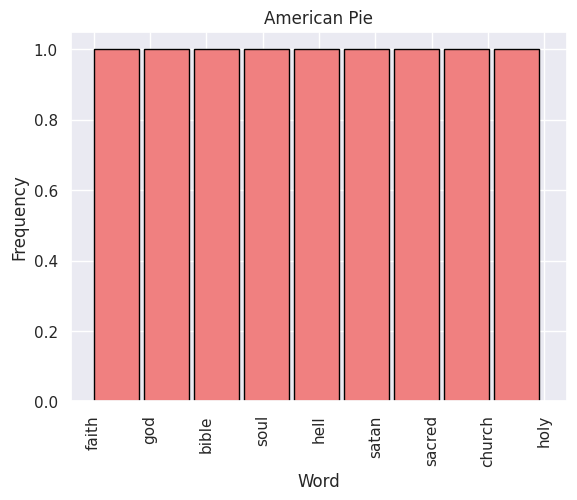

In [ ]:
get_word_count_breakdown_for_song(sorted_df,1,religious_words)

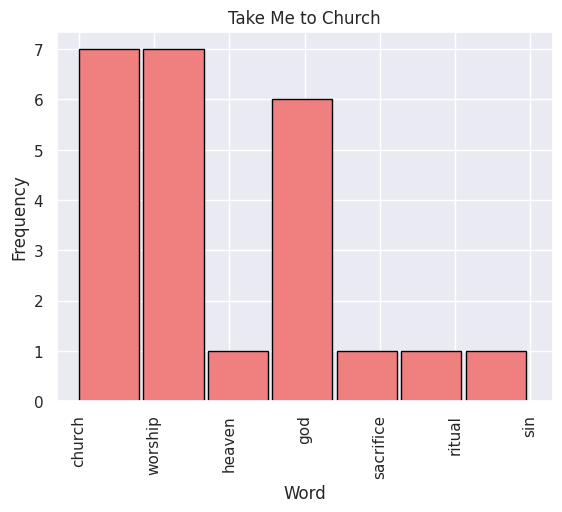

In [ ]:
get_word_count_breakdown_for_song(sorted_df,2,religious_words)

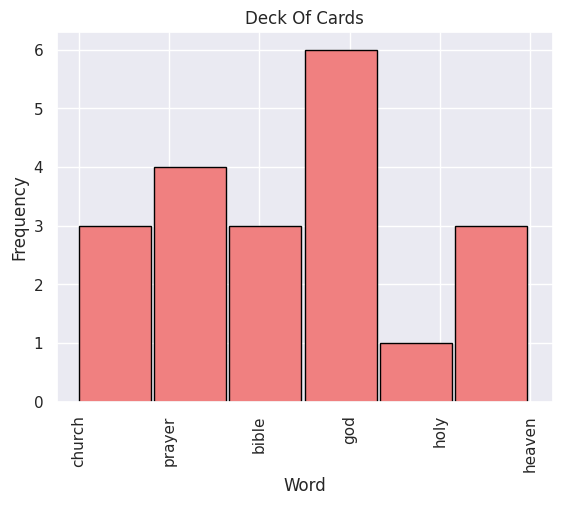

In [ ]:
get_word_count_breakdown_for_song(sorted_df,3,religious_words)